## Plan of Action

*   **UTK Face Dataset** images have labels embedded in their name, as per the following nomenclature:
 * [age]\_[gender]\_[race]\_[time].jpg
* **Import Gender Dataset** from Drive and **read gender labels** from file name
* Convert all images to **grayscale**
* Using **X epochs** on our **defined CNN Architecture**, comprising of:
    - an input *Conv2D* layer (with 32 filters) paired with an *MaxPooling2D* layer,
    - 3 pairs of *Conv2D* (with 64, 128 & 256 filters) and *MaxPooling2D* layers,
    - 1 *Dense* layer with 128 nodes, and
    - an output *Dense* layer with 3 nodes.

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project5_AgeGenderEmotion_Detection/1.2_gender_input_output
! ls

/content/drive/MyDrive/Project5_AgeGenderEmotion_Detection/1.2_gender_input_output
input  output


## Import Libraries/ Functions

In [ ]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPooling2D,AvgPool2D,GlobalAveragePooling2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split


from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

## Import Dataset

In [ ]:
# Ref:  https://github.com/ChibaniMohamed/cnn_age_gender/blob/main/train.py

path = "./input/UTKFace"
pixels = []
age = []
gender = []

i=0
for img in os.listdir(path):
  i=i+1
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.resize(img,(100,100))
  pixels.append(np.array(img))
  gender.append(np.array(genders))

pixels = np.array(pixels)
gender = np.array(gender,np.uint64)

In [ ]:
len(pixels)

4765

In [ ]:
len(gender)

4765

## Split into Train/ Test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(pixels,gender,random_state=100)

In [ ]:
len(x_train)

3573

In [ ]:
len(x_test)

1192

## Define CNN Architecture

In [ ]:
input = Input(shape = (100,100,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(2,activation="sigmoid")(drop_1)

In [ ]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam",loss=["sparse_categorical_crossentropy"],metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,567,874 (5.98 MB)

 Trainable params: 1,567,874 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_path='./output/gender_model.keras'  # Change the file extension to '.keras'
checkpointer = ModelCheckpoint(model_path, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
model_path='./output/gender_model.h5'
checkpointer = ModelCheckpoint(model_path, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

## Model Training

In [ ]:
save = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[callback_list])

Epoch 1/50
109/112 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9692 - loss: 0.2173
Epoch 1: loss did not improve from 0.21122
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9690 - loss: 0.2180 - val_accuracy: 0.8633 - val_loss: 0.5125
Epoch 2/50
109/112 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9644 - loss: 0.2268
Epoch 2: loss did not improve from 0.21122
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9644 - loss: 0.2271 - val_accuracy: 0.8490 - val_loss: 0.6692
Epoch 3/50
109/112 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9591 - loss: 0.2452
Epoch 3: loss did not improve from 0.21122
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9592 - loss: 0.2445 - val_accuracy: 0.8532 - val_loss: 0.7433
Epoch 4/50
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9705 - loss: 0.2046
Epoch 4: loss did not improve from 0.21122
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9705 - loss: 0.2048 - val_accuracy: 0.8473 - val_loss: 0.6015
Epoch 5/

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

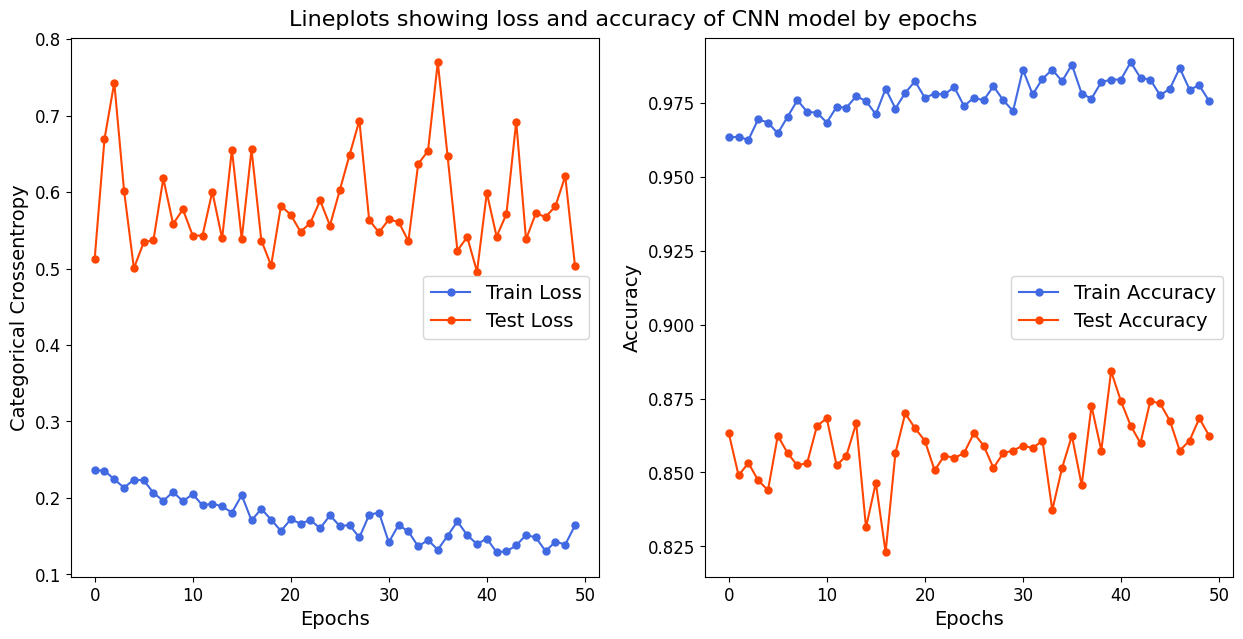

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)